In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from dateutil import parser
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [5]:
df = pd.read_csv('/Users/nealcheng/desktop/data/carInsurance_train.csv')

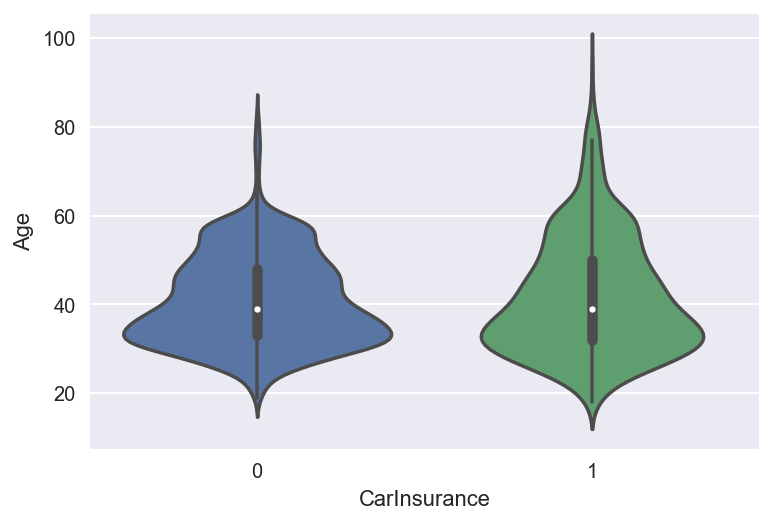

In [275]:
sns.violinplot(y = 'Age',x='CarInsurance',data=df)

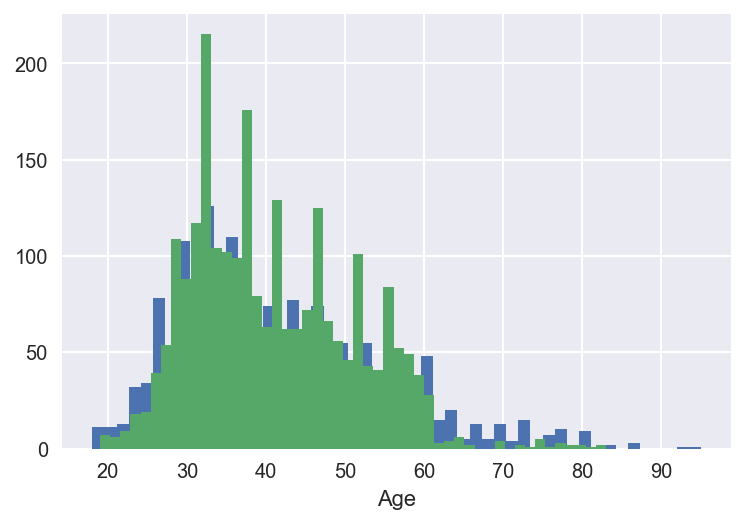

In [276]:
n,bin,_ = plt.hist(df[df['CarInsurance']==1]['Age'],bins=50)
n,bin,_ = plt.hist(df[df['CarInsurance']==0]['Age'],bins=50)
plt.xlabel('Age')


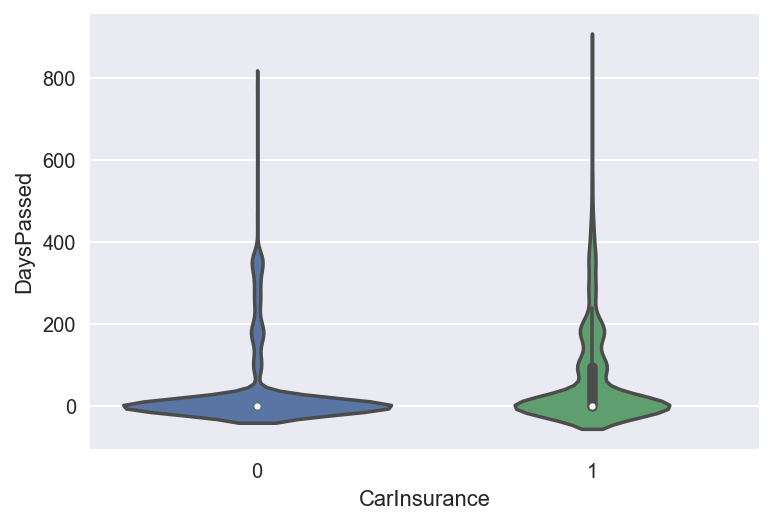

In [277]:
sns.violinplot(y = 'DaysPassed',x='CarInsurance',data=df)

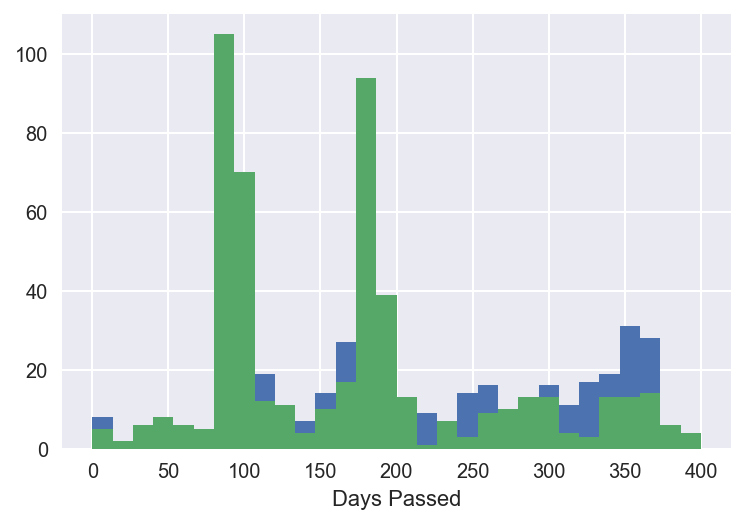

In [278]:
count0,bins2,_ = plt.hist(df[df['CarInsurance']==0]['DaysPassed'],bins=30, range = (0,400))
count1,bins1,_ = plt.hist(df[df['CarInsurance']==1]['DaysPassed'],bins=30, range = (0,400))
plt.xlabel('Days Passed')


(-3000, 15000)

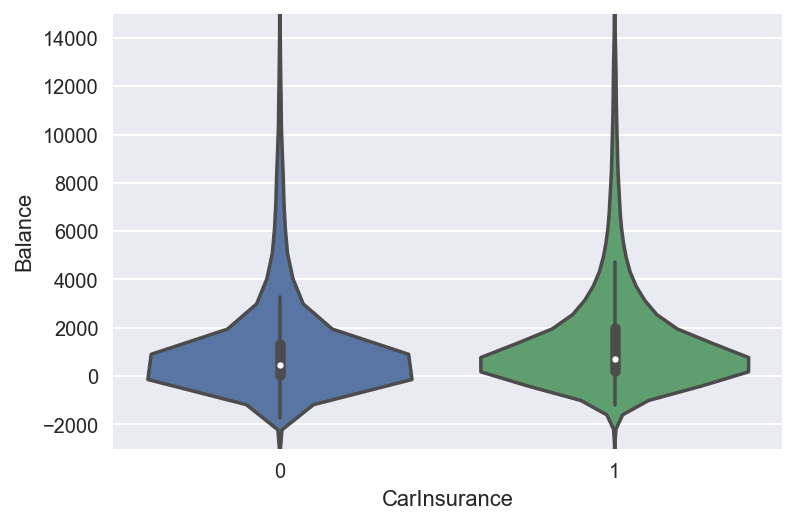

In [280]:
sns.violinplot(y = 'Balance',x='CarInsurance',data=df);
plt.ylim(-3000,15000)

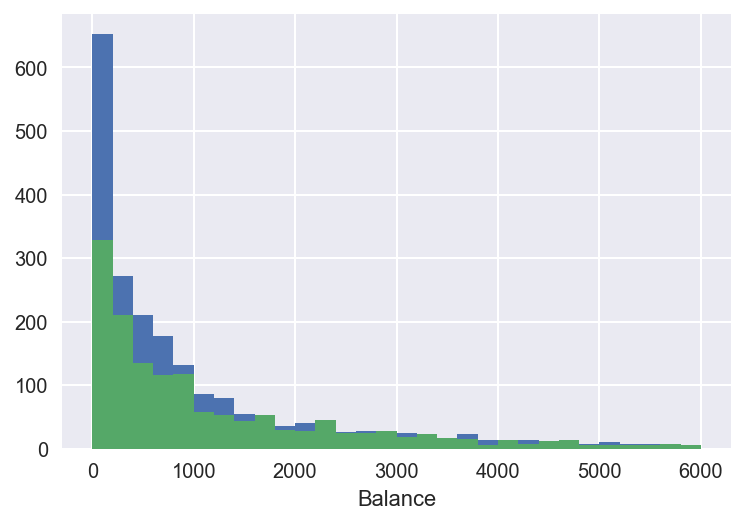

In [281]:
count0,bins2,_ = plt.hist(df[df['CarInsurance']==0]['Balance'],bins=30, range = (0,6000))
count1,bins1,_ = plt.hist(df[df['CarInsurance']==1]['Balance'],bins=30, range = (0,6000))
plt.xlabel('Balance')

Plotting Numerical Features

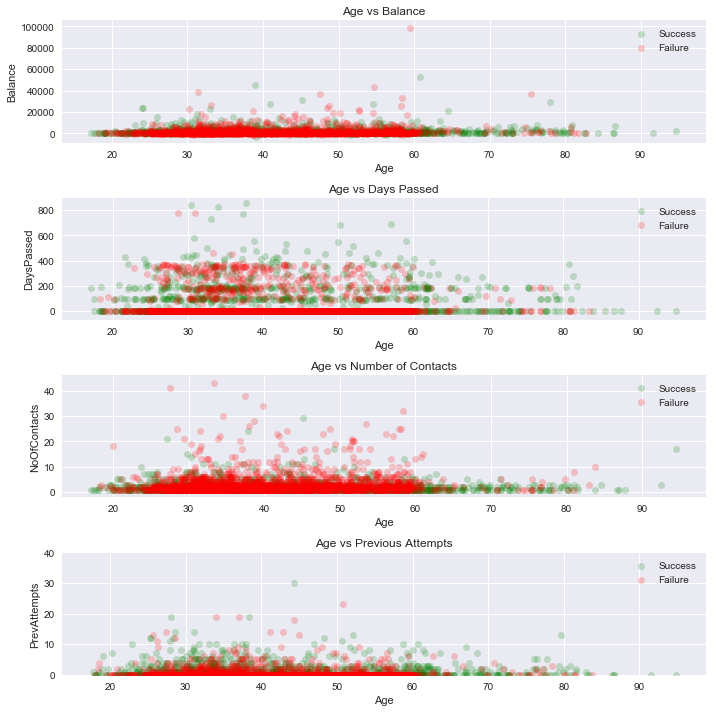

In [91]:
f, ax = plt.subplots(nrows = 4,ncols = 1,figsize=(10, 10))

sns.regplot(ax = ax[0],x="Age", y="Balance", data=df_total_with_y[df_total_with_y['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[0],x="Age", y="Balance", data=df_total_with_y[df_total_with_y['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[0].legend(['Success','Failure'])
ax[0].set_title('Age vs Balance')

sns.regplot(ax = ax[1],x="Age", y="DaysPassed", data=df_total_with_y[df_total_with_y['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[1],x="Age", y="DaysPassed", data=df_total_with_y[df_total_with_y['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[1].legend(['Success','Failure'])
ax[1].set_title('Age vs Days Passed')


sns.regplot(ax = ax[2],x="Age", y="NoOfContacts", data=df_total_with_y[df_total_with_y['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[2],x="Age", y="NoOfContacts", data=df_total_with_y[df_total_with_y['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[2].legend(['Success','Failure'])
ax[2].set_title('Age vs Number of Contacts')

sns.regplot(ax = ax[3],x="Age", y="PrevAttempts", data=df_total_with_y[df_total_with_y['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[3],x="Age", y="PrevAttempts", data=df_total_with_y[df_total_with_y['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[3].legend(['Success','Failure'])
ax[3].set_title('Age vs Previous Attempts')

plt.ylim(0,40);
plt.tight_layout()


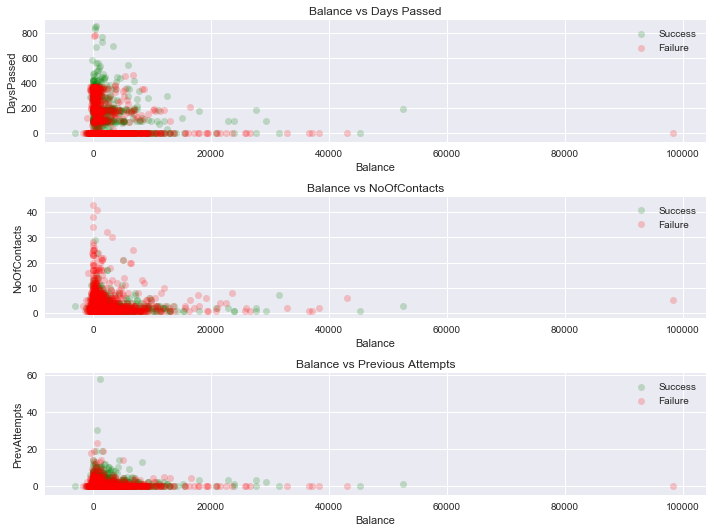

In [92]:
f, ax = plt.subplots(nrows = 3,ncols = 1,figsize=(10,7.5))

sns.regplot(ax = ax[0],x="Balance", y="DaysPassed", data=df[df['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[0],x="Balance", y="DaysPassed", data=df[df['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[0].legend(['Success','Failure'])
ax[0].set_title('Balance vs Days Passed')

sns.regplot(ax = ax[1],x="Balance", y="NoOfContacts", data=df[df['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[1],x="Balance", y="NoOfContacts", data=df[df['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[1].legend(['Success','Failure'])
ax[1].set_title('Balance vs NoOfContacts')


sns.regplot(ax = ax[2],x="Balance", y="PrevAttempts", data=df[df['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[2],x="Balance", y="PrevAttempts", data=df[df['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[2].legend(['Success','Failure'])
ax[2].set_title('Balance vs Previous Attempts')

plt.tight_layout()


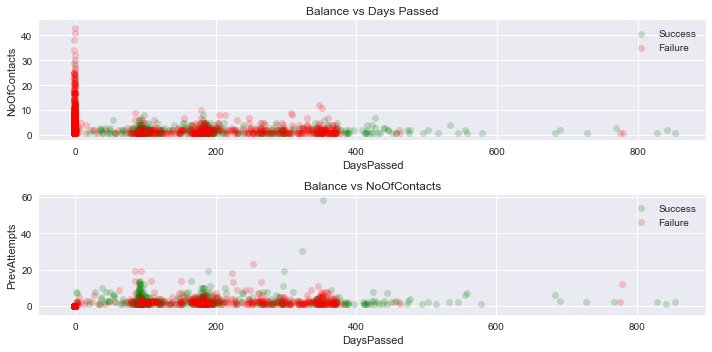

In [93]:
f, ax = plt.subplots(nrows = 2,ncols = 1,figsize=(10, 5))

sns.regplot(ax = ax[0],x="DaysPassed", y="NoOfContacts", data=df[df['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[0],x="DaysPassed", y="NoOfContacts", data=df[df['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[0].legend(['Success','Failure'])
ax[0].set_title('Balance vs Days Passed')

sns.regplot(ax = ax[1],x="DaysPassed", y="PrevAttempts", data=df[df['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(ax = ax[1],x="DaysPassed", y="PrevAttempts", data=df[df['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
ax[1].legend(['Success','Failure'])
ax[1].set_title('Balance vs NoOfContacts')

plt.tight_layout()


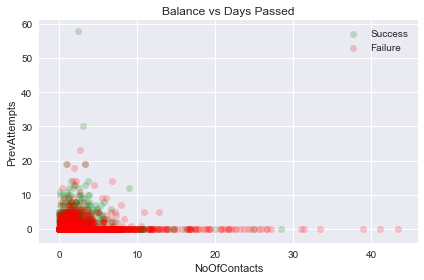

In [94]:
#f, ax = plt.subplots(nrows = 1,ncols = 1,figsize=(10, 10))

sns.regplot(x="NoOfContacts", y="PrevAttempts", data=df[df['CarInsurance']==1],fit_reg=False,color = 'g',scatter_kws={'alpha':0.2},x_jitter=1)
sns.regplot(x="NoOfContacts", y="PrevAttempts", data=df[df['CarInsurance']==0],fit_reg=False,color = 'r',scatter_kws={'alpha':0.2},x_jitter=1)
plt.legend(['Success','Failure'])
plt.title('Balance vs Days Passed')

plt.tight_layout()


In [97]:
# Creating dummy dataframe from categorical columns
df_categorical = df[['Job','Marital','Education','Communication','Outcome']]
df_categorical_dummies = pd.get_dummies(df_categorical,dummy_na=True)

# Numerical dataframe
df_numerical = df[['Age','Balance','DaysPassed','NoOfContacts','PrevAttempts']]

# Binary dataframe
df_binary = df[['Default','HHInsurance','CarLoan']]

# Time dataframe
df_time =  df[['LastContactDay','LastContactMonth','CallStart','CallEnd']]

In [98]:
# parsing into DateTime format
temp = df["LastContactDay"].map(str) + ' '+ df["LastContactMonth"] + ' ' + df['CallStart']
start_time = (df["LastContactDay"].map(str) + ' '+ df["LastContactMonth"] + ' ' + df['CallStart']).apply(parser.parse)
end_time = (df["LastContactDay"].map(str) + ' '+ df["LastContactMonth"] + ' ' + df['CallEnd']).apply(parser.parse)
df_datetime = pd.DataFrame({'CallStart':start_time,'CallEnd':end_time})
df_numerical['Hour'] = [x.hour/60 for x in df_datetime['CallStart']]

In [101]:
# Putting all of the dataframes together

df_total = pd.merge(df_numerical,df_time[['LastContactDay']],left_index = True,right_index=True)
df_total = pd.merge(df_total,df_binary,left_index = True,right_index=True)
df_total = pd.merge(df_total,df_categorical_dummies,left_index = True,right_index=True)
df_total_with_y = pd.merge(df_total,pd.DataFrame(df['CarInsurance']),left_index = True,right_index=True)


df_total.head()


,Age,Balance,DaysPassed,NoOfContacts,PrevAttempts,Hour,LastContactDay,Default,HHInsurance,CarLoan,...,Education_secondary,Education_tertiary,Education_nan,Communication_cellular,Communication_telephone,Communication_nan,Outcome_failure,Outcome_other,Outcome_success,Outcome_nan
0,32,1218,-1,2,0,0.216667,28,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,32,1156,-1,5,0,0.233333,26,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,29,637,119,1,1,0.266667,3,0,1,0,...,0,1,0,1,0,0,1,0,0,0
3,25,373,-1,2,0,0.200000,11,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,30,2694,-1,1,0,0.233333,3,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [120]:
# Creating train test
x, y = df_total.iloc[:,:],df['CarInsurance']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

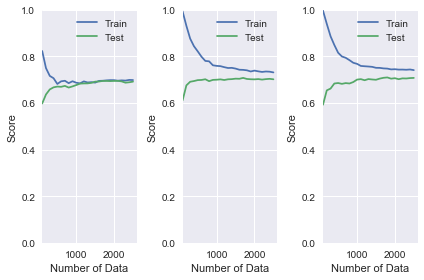

In [121]:
# Plotting Learning Curve

# Logistic Regression
temp = learning_curve(lr,x,y,train_sizes = np.arange(100,2600,100))

plt.subplot(131)
plt.plot([np.average(x) for x in temp[0]],[np.average(x) for x in temp[1]])
plt.plot([np.average(x) for x in temp[0]],[np.average(x) for x in temp[2]])
plt.legend(['Train','Test']);
plt.xlabel('Number of Data'); 
plt.ylabel('Score');
plt.xlim(100,2600);
plt.ylim(0,1);


temp = learning_curve(rf,x,y,train_sizes = np.arange(100,2600,100))
plt.subplot(132)
plt.subplot(132)

plt.plot([np.average(x) for x in temp[0]],[np.average(x) for x in temp[1]])
plt.plot([np.average(x) for x in temp[0]],[np.average(x) for x in temp[2]])
plt.legend(['Train','Test']);
plt.xlabel('Number of Data'); 
plt.ylabel('Score');
plt.xlim(100,2600);
plt.ylim(0,1);


temp = learning_curve(gb,x,y,train_sizes = np.arange(100,2600,100))
plt.subplot(133)
plt.plot([np.average(x) for x in temp[0]],[np.average(x) for x in temp[1]])
plt.plot([np.average(x) for x in temp[0]],[np.average(x) for x in temp[2]])
plt.legend(['Train','Test']);
plt.xlabel('Number of Data'); 
plt.ylabel('Score');
plt.xlim(100,2600);
plt.ylim(0,1);

plt.tight_layout()

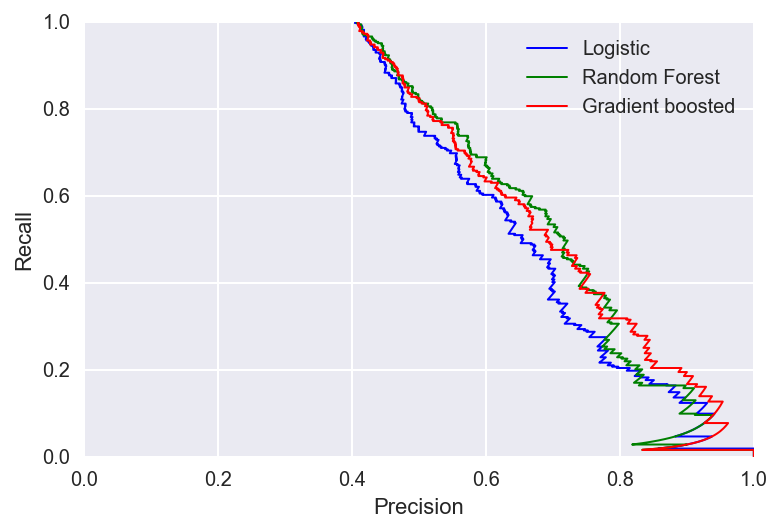

In [290]:

precision_list = pd.DataFrame()
recall_list = list()
lr_auc = list()
rf_auc = list()
gb_auc = list()
lr_log_loss_list = list()
rf_log_loss_list = list()
gb_log_loss_list = list()

kf2 = KFold(n_splits=5,shuffle = True)

for train_index, test_index in kf2.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    # Logistic
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)[:,1]
    
    
    #metrics.accuracy_score(y_test,y_pred)
    lr.coef_
    

    lr_recall_curve = metrics.precision_recall_curve(y_test,y_pred)
    lr_roc_curve = metrics.roc_curve(y_test,y_pred)
    lr_log_loss = metrics.log_loss(y_test,y_pred)
    lr_log_loss_list.append(lr_log_loss)
    lr_auc.append(roc_auc_score(y_test,y_pred))
    

    
    # Gradient Boosted Trees
    gb = GradientBoostingClassifier(n_estimators=200,learning_rate = 0.04,max_depth = 3)
    gb.fit(X_train,y_train)
    y_pred = gb.predict_proba(X_test)[:,1]
    gb_recall_curve = metrics.precision_recall_curve(y_test,y_pred)
    gb_roc_curve = metrics.roc_curve(y_test,y_pred)
    gb_log_loss = metrics.log_loss(y_test,y_pred)
    gb_log_loss_list.append(gb_log_loss)
    gb_auc.append(roc_auc_score(y_test,y_pred))


    #Random Forest
    rf = RandomForestClassifier(n_estimators=400,max_depth = 6)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_test)[:,1]
    rf_recall_curve = metrics.precision_recall_curve(y_test,y_pred)
    rf_roc_curve = metrics.roc_curve(y_test,y_pred)
    rf_log_loss = metrics.log_loss(y_test,y_pred)
    rf_log_loss_list.append(rf_log_loss)

    rf_auc.append(roc_auc_score(y_test,y_pred))

# Plotting precision-recall curve
plt.plot(lr_recall_curve[0],lr_recall_curve[1],'b',linewidth = 1);
plt.plot(rf_recall_curve[0],rf_recall_curve[1],'g',linewidth = 1);
plt.plot(gb_recall_curve[0],gb_recall_curve[1],'r',linewidth = 1);

plt.legend(['Logistic','Random Forest','Gradient boosted']);
plt.xlabel('Precision'); 
plt.ylabel('Recall');
plt.xlim(0,1);
plt.ylim(0,1);

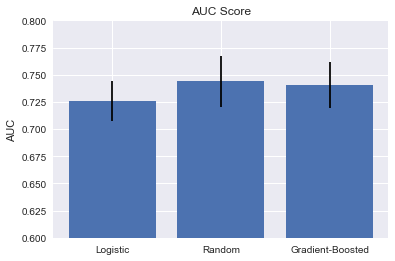

In [177]:
plt.bar([1,2,3],[np.average(lr_auc),np.average(rf_auc),np.average(gb_auc)],yerr = [np.std(lr_auc),np.std(rf_auc),np.std(gb_auc)]);
plt.ylim (0.6,0.8);
plt.xticks([1,2,3],['Logistic','Random','Gradient-Boosted']);
plt.ylabel('AUC'),plt.title('AUC Score');


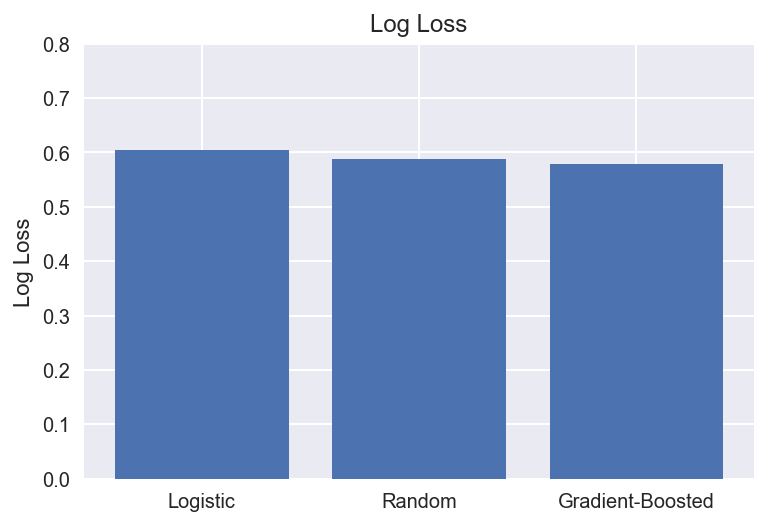

In [292]:
plt.bar([1,2,3],[np.average(lr_log_loss),np.average(rf_log_loss),np.average(gb_log_loss)],yerr = [np.std(lr_log_loss),np.std(rf_log_loss),np.std(gb_log_loss)]);
plt.ylim (0,0.8);
plt.xticks([1,2,3],['Logistic','Random','Gradient-Boosted']);
plt.ylabel('Log Loss'),plt.title('Log Loss');


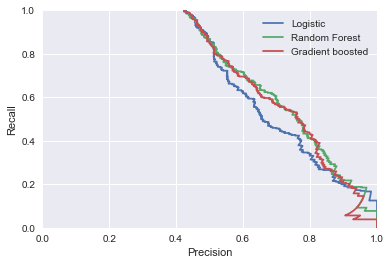

In [152]:
# Logistic
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict_proba(X_test)[:,1]
#metrics.accuracy_score(y_test,y_pred)
lr.coef_
lr_recall_curve = metrics.precision_recall_curve(y_test,y_pred)
lr_roc_curve = metrics.roc_curve(y_test,y_pred)
lr_log_loss = metrics.log_loss(y_test,y_pred)

# Gradient Boosted Trees
gb = GradientBoostingClassifier(n_estimators=100,learning_rate = 0.05,max_depth = 3)
gb.fit(X_train,y_train)
y_pred = gb.predict_proba(X_test)[:,1]
gb_recall_curve = metrics.precision_recall_curve(y_test,y_pred)
gb_roc_curve = metrics.roc_curve(y_test,y_pred)
gb_log_loss = metrics.log_loss(y_test,y_pred)


#Random Forest
rf = RandomForestClassifier(n_estimators=200,max_depth = 6)
rf.fit(X_train,y_train)
y_pred = rf.predict_proba(X_test)[:,1]
rf_recall_curve = metrics.precision_recall_curve(y_test,y_pred)
rf_roc_curve = metrics.roc_curve(y_test,y_pred)
rf_log_loss = metrics.log_loss(y_test,y_pred)


# Plotting precision-recall curve
plt.plot(lr_recall_curve[0],lr_recall_curve[1]);
plt.plot(rf_recall_curve[0],rf_recall_curve[1]);
plt.plot(gb_recall_curve[0],gb_recall_curve[1]);

plt.legend(['Logistic','Random Forest','Gradient boosted']);
plt.xlabel('Precision'); 
plt.ylabel('Recall');
plt.xlim(0,1);
plt.ylim(0,1);

In [66]:
# gs = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=
#              {'n_estimators':[50,100,200],'learning_rate':[0.03,0.04,0.05,0.06],'max_depth':[1,2,3,4,5]    
# },n_jobs = -1,verbose = 1)

rf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=
             {'n_estimators':[100,200,300,400],'max_depth':np.arange(4,8) 
},n_jobs = -1,verbose = 1)


rf.fit(X_train,y_train)
rf.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   24.3s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

(0, 1)

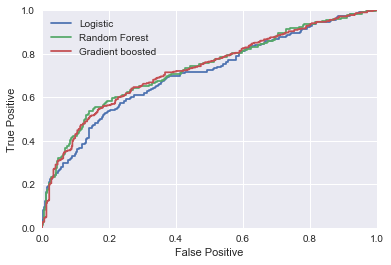

In [105]:
# Plotting ROC curve
plt.plot(lr_roc_curve[0],lr_roc_curve[1])
plt.plot(rf_roc_curve[0],rf_roc_curve[1])
plt.plot(gb_roc_curve[0],gb_roc_curve[1])
plt.legend(['Logistic','Random Forest','Gradient boosted'])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)

We need to improve the model!

In [106]:
from sklearn.metrics import roc_auc_score

In [107]:
roc_auc_score(y_test,y_pred)

0.73256485646228042

The feature importance of the random forest

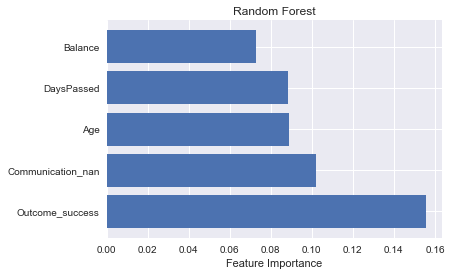

In [193]:
rf_coef = list(zip(X_train.columns[np.argsort(-rf.feature_importances_)],rf.feature_importances_[np.argsort(-rf.feature_importances_)]))
plt.barh(np.arange(0,5),[x[1] for x in rf_coef[0:5]]);
plt.yticks(np.arange(0,5),[x[0] for x in rf_coef[0:5]]);
plt.xlabel('Feature Importance'),plt.title('Random Forest');


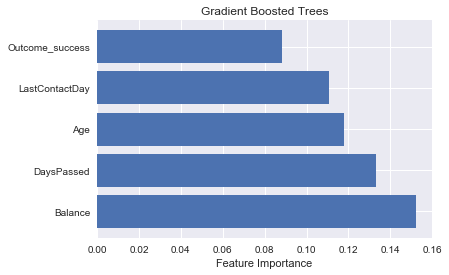

In [192]:
gb_coef = list(zip(X_train.columns[np.argsort(-gb.feature_importances_)],gb.feature_importances_[np.argsort(-gb.feature_importances_)]))
plt.barh(np.arange(0,5),[x[1] for x in gb_coef[0:5]]);
plt.yticks(np.arange(0,5),[x[0] for x in gb_coef[0:5]]);
plt.xlabel('Feature Importance'),plt.title('Gradient Boosted Trees');

In [37]:
pf = PolynomialFeatures(interaction_only = True)

In [61]:
# Looking for interaction terms

interaction = pd.DataFrame(pf.fit_transform(df_total))
interaction.columns = pf.get_feature_names(input_features=df_total.columns)

# Creating train test
x, y = interaction.iloc[:,:-1],df_total_with_y['CarInsurance']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)






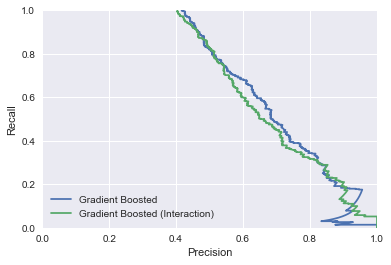

In [62]:
# Gradient Boosted Trees
gb = GradientBoostingClassifier(n_estimators=100,learning_rate = 0.07,max_depth = 2,random_state=432)
gb.fit(X_train,y_train)
y_pred = gb.predict_proba(X_test)[:,1]
gb_recall_curve_interaction = metrics.precision_recall_curve(y_test,y_pred)
gb_roc_curve_interaction = metrics.roc_curve(y_test,y_pred)
gb_log_loss_interaction = metrics.log_loss(y_test,y_pred)

plt.plot(gb_recall_curve[0],gb_recall_curve[1]);
plt.plot(gb_recall_curve_interaction[0],gb_recall_curve_interaction[1]);

plt.legend(['Gradient Boosted','Gradient Boosted (Interaction)']);
plt.xlabel('Precision'); 
plt.ylabel('Recall');
plt.xlim(0,1);
plt.ylim(0,1);


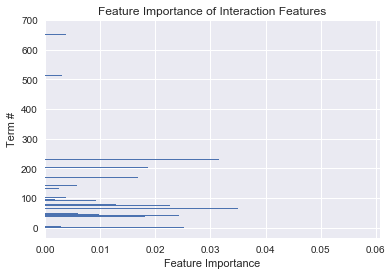

In [45]:
plt.barh(list(range(len(gb.feature_importances_))),gb.feature_importances_);
plt.title('Feature Importance of Interaction Features');
plt.xlabel('Feature Importance');
plt.ylabel('Term #');

In [ ]:
gs = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=
             {'n_estimators':[100,300,500],'learning_rate':[0.05,0.07,0.1,0.12],'max_depth':[2,3,4,5]    
},n_jobs = -1,verbose = 1)
gs.fit(X_train,y_train)
gs.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min


(0, 1)

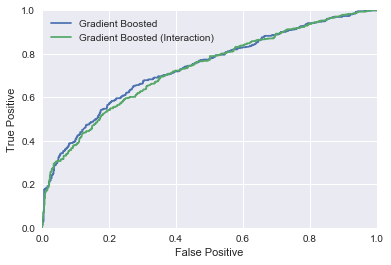

In [47]:
# Plotting ROC curve
plt.plot(gb_roc_curve[0],gb_roc_curve[1])
plt.plot(gb_roc_curve_interaction[0],gb_roc_curve_interaction[1])
plt.legend(['Gradient Boosted','Gradient Boosted (Interaction)'])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)

In [53]:
gb_coef = list(zip(X_train.columns[np.argsort(-gb.feature_importances_)],gb.feature_importances_[np.argsort(-gb.feature_importances_)]))
gb_coef

[('DaysPassed HHInsurance', 0.057833495660428502),
 ('DaysPassed', 0.035503346950748249),
 ('Age Communication_cellular', 0.035061030011384761),
 ('NoOfContacts LastContactDay', 0.034979498603421741),
 ('Balance Communication_cellular', 0.03479698647023078),
 ('LastContactDay Outcome_success', 0.031488951644168393),
 ('Age NoOfContacts', 0.028066442493438058),
 ('LastContactDay Communication_nan', 0.026424402359490441),
 ('Age', 0.025163519985467349),
 ('Age LastContactDay', 0.024355369684429851),
 ('Balance Default', 0.023231016695318654),
 ('Balance LastContactDay', 0.022637343891476806),
 ('DaysPassed Outcome_success', 0.021968103607172385),
 ('Balance', 0.021879991408636661),
 ('Age Communication_nan', 0.020490597658474899),
 ('NoOfContacts Education_secondary', 0.020413257211891161),
 ('LastContactDay HHInsurance', 0.018616373251793258),
 ('Age Outcome_nan', 0.018560336267941843),
 ('LastContactDay Outcome_nan', 0.01837579151230942),
 ('Age DaysPassed', 0.018155992633022745),
 ('O

In [60]:
temp = pd.DataFrame(gb_coef)
temp.to_csv('gb_rf.csv',header = False, index = False)

Applying the model to business

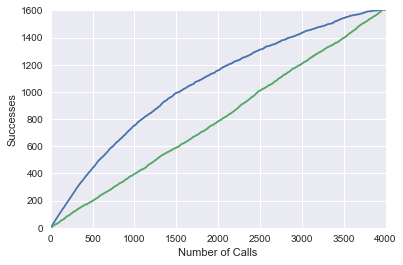

In [227]:
df_probability = pd.DataFrame({'y_test':y,'y_pred':y_pred})

# Comparing model vs baseline 

# Gradient Boosted Trees
gb = GradientBoostingClassifier(n_estimators=100,learning_rate = 0.07,max_depth = 2,random_state=432)
gb.fit(x,y)
y_pred = gb.predict_proba(x)[:,1]

df_probability.sort_values('y_pred',ascending=False,inplace=True)

# Now looking at how random picking would fare
no_model = [y[random.randint(0,3999)] for i in y]

plt.plot(np.arange(0,len(y)),np.cumsum(df_probability['y_test']))
plt.plot(np.arange(0,len(y)),np.cumsum(no_model))
plt.xlim(0,4000)
plt.ylim(0,1600)
plt.xlabel('Number of Calls')
plt.ylabel('Successes')


/Users/nealcheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


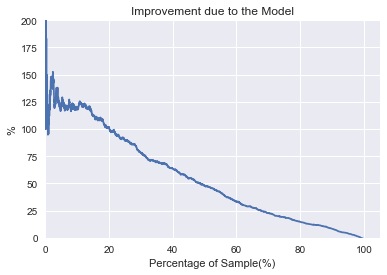

In [269]:
percent_increase = np.divide(np.cumsum(df_probability['y_test']),np.cumsum(no_model))
plt.plot(np.arange(0,len(y))/40,percent_increase*100-100)
plt.xlim(0)

plt.ylim(0,200)
plt.xlabel('Percentage of Sample(%)')
plt.ylabel('%')
plt.title('Improvement due to the Model')